# Digit

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [39]:
# load digits dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [40]:
X = digits.data
Y_obj = digits.target

In [41]:
X.shape

(1797, 64)

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
np.mean(X_scaled), np.std(X_scaled)

(0.3071437902148591, 0.3766279093674481)

In [43]:
Y_obj[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
# One-Hot Encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
Y = np_utils.to_categorical(Y_obj)

In [45]:
Y.shape

(1797, 10)

In [46]:
# 훈련데이터셋 테스트데이터셋 (8:2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=seed)

In [47]:
# 모델 설정
model = Sequential([
    InputLayer(input_shape=[64,]),
    Dense(252, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10)
]) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 252)               16380     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               25300     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
Total params: 47,240
Trainable params: 47,240
Non-trainable params: 0
_________________________________________________________________


In [48]:
from tensorflow.keras.optimizers import Adam
# 모델 컴파일 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001140995627618109),
              metrics=['accuracy'])

In [49]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/digits/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [50]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [51]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [52]:
# 모델 실행 및 저장
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5000, batch_size=400,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 7.72957, saving model to ./model/digits/final001-7.7296.hdf5

Epoch 00002: val_loss did not improve from 7.72957

Epoch 00003: val_loss did not improve from 7.72957

Epoch 00004: val_loss did not improve from 7.72957

Epoch 00005: val_loss did not improve from 7.72957

Epoch 00006: val_loss did not improve from 7.72957

Epoch 00007: val_loss did not improve from 7.72957

Epoch 00008: val_loss improved from 7.72957 to 7.46407, saving model to ./model/digits/final008-7.4641.hdf5

Epoch 00009: val_loss improved from 7.46407 to 7.03575, saving model to ./model/digits/final009-7.0358.hdf5

Epoch 00010: val_loss improved from 7.03575 to 6.88466, saving model to ./model/digits/final010-6.8847.hdf5

Epoch 00011: val_loss improved from 6.88466 to 6.58428, saving model to ./model/digits/final011-6.5843.hdf5

Epoch 00012: val_loss improved from 6.58428 to 6.11699, saving model to ./model/digits/final012-6.1170.hdf5

Epoch 00013: val_loss improved from 6

In [53]:
del model
model = load_model('model/digits/final013-5.5006.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test, verbose=2)[1]))

360/360 - 0s - loss: 5.3532 - accuracy: 0.1444

 Accuracy: 0.1444


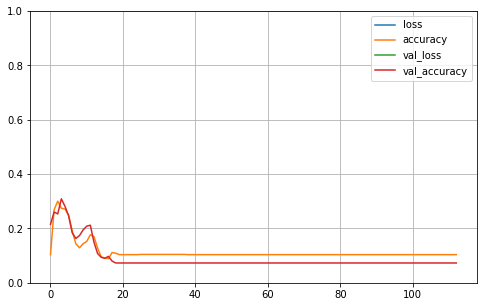

In [54]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3,input_shape=[64]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizer.Adam(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model